# Multi-Qubit Gates

In [12]:
#Needed Libraries
from qiskit import QuantumCircuit, Aer, assemble
from math import pi
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit_textbook.tools import array_to_latex
svsim = Aer.get_backend('statevector_simulator')

In [13]:
'''
Lets start by applying a C-NOT gate on a set of classical states (0 or 1)
This gate performs a not gate on the target if the control qubit is 1 (Remember control is first then target)
'''
qc=QuantumCircuit(2)
qc.cx(0,1)
qc.draw()

q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘

In [14]:
'''
BUT what happens if we do some superpositions (hadamard gates)
The hadamard gate allows our qubit to be in a superposition ( We can think of this as being 0 and 1 at the same time, or having 50/50 chance of getting a 0 or 1)
This is an interesting state, because now how does the C-NOT control decide if its a 0 or 1?
'''
qc=QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

In [15]:
'''
Lets check out the statevector. Here we print the final result instead of the whole circuit. 
Finally, this state is extremely important because here we have created an entangled state. 
Entangle means that now q_0 and q_1 are connected in a very intrinsict, quantum manner.
'''
qobj = assemble(qc)
result = svsim.run(qobj).result()
final_state = result.get_statevector()
array_to_latex(final_state, pretext="\\text{Statevector = }")

<IPython.core.display.Math object>

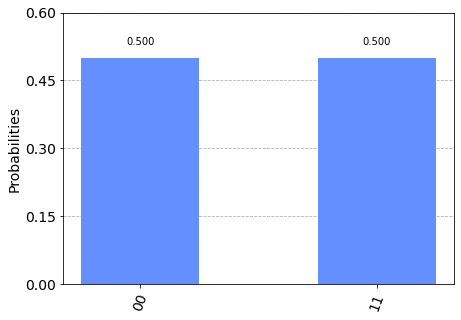

In [18]:
'''
This state has a name : Bell state
One of its most interesting observations is that this state has a 50% of boing in state 00 and 50% of being in state 11
Can you explain why?
'''
plot_histogram(result.get_counts())

In [17]:
'''
Answer: 
    We know q_1 is in state 0 to start with [1,0]
    q_0 on the other hand has a 50% chance of being in state 0 ([1,0]) and 50% chance of being in state 1 ([0,1])
    IF q_0 is state 0 then the final circuit state is 00 and if q_0 is in state 1 then the final answer is 11 (because of the C-NOT gate)
'''

'\nAnswer: \n    We know q_1 is in state 0 to start with [1,0]\n    q_0 on the other hand has a 50% chance of being in state 0 ([1,0]) and 50% chance of being in state 1 ([0,1])\n    IF q_0 is state 0 then the final circuit state is 00 and if q_0 is in state 1 then the final answer is 11 (because of the C-NOT gate)\n'

In [ ]:
'''
When qubits are entangled, they cannot be written as two separate qubit states. This has very interesting implications.
1) IF we measure one of the qubits, both qubits will collapse the superposition
2) Measuring one qubit will tell us the state of both qubits
3) This entanglement can happen even if the qubits are light years apart
4) ***There is no way of using shared quantum states to communicate. Also knows as the No Communication Theorem
'''

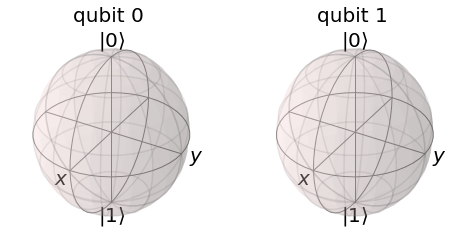

In [19]:
'''
Can we visualize entangled states?
IF we try to plot them in a bloch sphere we get the following
'''
plot_bloch_multivector(final_state)

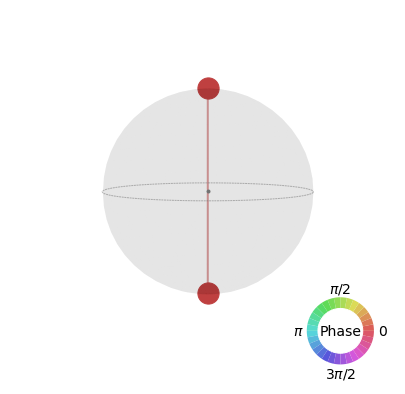

In [20]:
'''
Straight from the class:
This shows us there is no single-qubit measurement basis for which a specific measurement is guaranteed. 
This constrasts with our single qubit states, in which we could always pick a single-qubit basis. 
Looking at the individual qubits in this way, we miss the important effect of correlation between the qubits. 
We cannot distinguish between different entangled states

BUT there is another way we can visualize it, using a q-sphere. Here we can see that both 00 and 11 are on display.
'''
from qiskit.visualization import plot_state_qsphere
plot_state_qsphere(final_state)

# Exercises 
![Chapter2-3Excersices](Images/Chapter2-3Excersices.PNG "Chapter2-3Excersices")

In [24]:
'''
3.4.1
'''
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.cx(0,1)
qc.draw()

┌───┐     
q_0: ┤ H ├──■──
     ├───┤┌─┴─┐
q_1: ┤ X ├┤ X ├
     └───┘└───┘

In [25]:
qobj = assemble(qc)
result = svsim.run(qobj).result()
final_state = result.get_statevector()
array_to_latex(final_state, pretext="\\text{Statevector = }")

<IPython.core.display.Math object>

In [26]:
'''
3.4.2
'''
usim = Aer.get_backend('unitary_simulator')
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary, pretext="\\text{Circuit = }\n")

<IPython.core.display.Math object>